# Recognizing one 7 segment display digit
### input are values of 7 segments of the digital display. Output is a binary representation of the number shown.
![7 segment display to binary](7 to BCD.png "task at hand")

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
import keras.callbacks as cb
from keras.layers.normalization import BatchNormalization
from IPython.display import SVG

input and output data

In [11]:
zer = [1,1,1,1,1,1,0]
one = [0,1,1,0,0,0,0]
two = [1,1,0,1,1,0,1]
thr = [1,1,1,1,0,0,1]
fou = [0,1,1,0,0,1,1]
fiv = [1,0,1,1,0,1,1]
six = [1,0,1,1,1,1,1]
sev = [1,1,1,0,0,0,0]
eig = [1,1,1,1,1,1,1]
nin = [1,1,1,1,0,1,1]
eij = [1,1,1,0,1,1,1] #A
bee = [0,0,1,1,1,1,1] #b
see = [1,0,0,1,1,1,0] #C
dee = [0,1,1,1,1,0,1] #d
eee = [1,0,0,1,1,1,1] #E
eff = [1,0,0,0,1,1,1] #F
inp=[zer, one, two, thr, fou, fiv, six, sev, eig, nin, eij, bee, see, dee, eee, eff]
out=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]

X_df=pd.DataFrame(inp,columns=['l1','l2','l3','l4','l5','l6','l7'])
X_df
Y_df=pd.DataFrame(out,columns=['b0','b1','b2','b3'])
Y_df
print(X_df.shape, Y_df.shape)
X=X_df.values
Y=Y_df.values

(16, 7) (16, 4)


#### NN model

In [234]:
class EarlyStop(cb.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # print(logs)
        
        if logs['binary_accuracy']>0.99:
            print("B_A early stop at epoch: ",  epoch)
            self.model.stop_training = True

callbacks = [
    EarlyStop(),
]



In [248]:
from keras import backend as K

def my_loss(y_true, y_pred):
    npx=K.get_value(y_true)
    return K.sum(K.square(y_pred-y_true))

model = Sequential()
L1=Dense( units=7, input_shape=(7,), activation='relu')
model.add(L1)
L2=Dense(units=4, activation='sigmoid') 
model.add(L2)


#my_sgd = optimizers.SGD(lr=0.01, momentum=0.5, decay=0.01, nesterov=True)

# model.compile(loss="binary_crossentropy",optimizer="adam", metrics=['accuracy','binary_accuracy'] )
model.compile(loss=my_loss,optimizer="adam", metrics=['accuracy','binary_accuracy'] )

# activations - relu, tanh, sigmoid, softmax
# optimizers - adam, rmsprop, sgd, my_sgd, adagrad
# loss functions - mse,  categorical_crossentropy, hinge, binary_crossentropy, vector_mse


model.summary()

InvalidArgumentError: You must feed a value for placeholder tensor 'dense_184_target' with dtype float and shape [?,?]
	 [[Node: dense_184_target = Placeholder[dtype=DT_FLOAT, shape=[?,?], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: dense_184_target/_3575 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_5_dense_184_target", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'dense_184_target', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-248-b36943a0644f>", line 17, in <module>
    model.compile(loss=my_loss,optimizer="adam", metrics=['accuracy','binary_accuracy'] )
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 784, in compile
    **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/training.py", line 745, in compile
    dtype=K.dtype(self.outputs[i]))
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py", line 442, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'dense_184_target' with dtype float and shape [?,?]
	 [[Node: dense_184_target = Placeholder[dtype=DT_FLOAT, shape=[?,?], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: dense_184_target/_3575 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_5_dense_184_target", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


B_A early stop at epoch:  2581


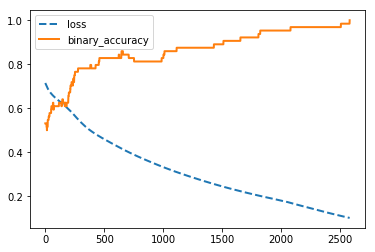

['0.11', '0.01', '0.00', '0.00'] [0, 0, 0, 0] [0, 0, 0, 0] Yay!
['0.00', '0.50', '0.03', '0.99'] [0, 0, 0, 1] [0, 0, 0, 1] Yay!
['0.16', '0.06', '1.00', '0.11'] [0, 0, 1, 0] [0, 0, 1, 0] Yay!
['0.04', '0.20', '0.93', '1.00'] [0, 0, 1, 1] [0, 0, 1, 1] Yay!
['0.23', '0.74', '0.00', '0.16'] [0, 1, 0, 0] [0, 1, 0, 0] Yay!
['0.03', '0.98', '0.06', '0.99'] [0, 1, 0, 1] [0, 1, 0, 1] Yay!
['0.30', '0.91', '0.99', '0.18'] [0, 1, 1, 0] [0, 1, 1, 0] Yay!
['0.00', '0.53', '0.99', '0.99'] [0, 1, 1, 1] [0, 1, 1, 1] Yay!
['1.00', '0.01', '0.10', '0.00'] [1, 0, 0, 0] [1, 0, 0, 0] Yay!
['0.75', '0.03', '0.00', '0.83'] [1, 0, 0, 1] [1, 0, 0, 1] Yay!
['0.81', '0.22', '0.98', '0.00'] [1, 0, 1, 0] [1, 0, 1, 0] Yay!
['0.79', '0.17', '0.89', '0.87'] [1, 0, 1, 1] [1, 0, 1, 1] Yay!
['0.94', '0.96', '0.03', '0.00'] [1, 1, 0, 0] [1, 1, 0, 0] Yay!
['1.00', '0.68', '0.03', '0.98'] [1, 1, 0, 1] [1, 1, 0, 1] Yay!
['0.98', '0.98', '0.95', '0.09'] [1, 1, 1, 0] [1, 1, 1, 0] Yay!
['0.95', '1.00', '1.00', '0.82'] [1, 1, 

In [247]:
epochs=10000
hist = model.fit(X, Y, epochs=epochs,  verbose=0, shuffle=True, callbacks=callbacks)#,batch_size=8)

epochs_done=len(hist.history['acc'])
x = np.linspace(0,epochs_done-1,epochs_done)
plt.plot(x, hist.history['loss'], '--', linewidth=2, label='loss')
# plt.plot(x, hist.history['acc'], '-', linewidth=2, label='acc')
plt.plot(x, hist.history['binary_accuracy'], '-', linewidth=2, label='binary_accuracy')
plt.legend()
plt.show()

pred = model.predict(inp)
for co,i in enumerate(pred):
    c=[]
    for j in i:
        if j>0.5: c.append(1)
        else: c.append(0)
    if c==out[co]: 
        st="Yay!"
    else:
        st="Nay"
    print(["{0:0.2f}".format(n) for n in i], c, out[co], st)